## Setting Up The Environment

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
print("Tensorflow Version",tf.__version__)
from keras.models import load_model
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import sentencepiece
import pandas as pd
from tqdm import tqdm
from scipy.special import softmax
import warnings
warnings.filterwarnings("ignore")


from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax


from tqdm import tqdm
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch


import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output



import ipywidgets as widgets
from IPython.display import display



import pandas as pd
from tqdm import tqdm
from scipy.special import softmax
from tabulate import tabulate

import pyfiglet

Tensorflow Version 2.13.0


[nltk_data] Downloading package stopwords to C:\Users\AKSHAY KUMAR
[nltk_data]     DHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## initializing all the function

In [3]:


stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

# Regular expression pattern to match mentions
mention_pattern = r'@[\w\d_]+'

# Function to remove mentions from a comment
def remove_mentions(comment):
    return re.sub(mention_pattern, '', comment)





text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)




def preprocess1(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)


In [4]:

# Folder containing CSV files
folder_path = "D:\\internship\\data\\Instagram\\Donna Taggart"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Filter out only CSV files
csv_files = [file for file in file_list if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each CSV file, read its content, and store in the list of DataFrames
for csv_file in csv_files:
    csv_file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(csv_file_path)
    dfs.append(df)

# Concatenate the list of DataFrames into a single merged DataFrame
merged_df_insta = pd.concat(dfs, ignore_index=True)




#data cleaning



#renaming coloumns 
new_column_names = {
    '="Comment Text"': 'Comment Text',
    '="Date"': 'Date',
    '="Username"':'Username',
    '="User Id"':'User Id'
    
}
merged_df_insta.rename(columns=new_column_names, inplace=True)

selected_columns = ['User Id','Username','Comment Text','Date']
merged_df_insta=merged_df_insta[selected_columns]
#Formating the User Id,Username and Comment text coloumn 
merged_df_insta['Comment Text'] = merged_df_insta['Comment Text'].str.lstrip('="').str.rstrip('"')
merged_df_insta['User Id'] = merged_df_insta['User Id'].str.lstrip('="').str.rstrip('"')
merged_df_insta['Username'] = merged_df_insta['Username'].str.lstrip('="').str.rstrip('"')
#Formating the Data coloumn. 
merged_df_insta['Date'] = pd.to_datetime(merged_df_insta['Date'], format='="%m/%d/%Y, %I:%M:%S %p"')
merged_df_insta['Date'] = merged_df_insta['Date'].dt.strftime('%Y-%m-%d %H:%M')
 

In [5]:
merged_df_insta
desired_username= 'donnataggartofficial'
merged_df_insta_with_reply = merged_df_insta[merged_df_insta['Username'] == desired_username]
merged_df_insta_without_reply=merged_df_insta[merged_df_insta['Username'] != desired_username]


In [6]:
# Folder containing CSV files
folder_path = "D:\\internship\\data\\Facebook\\Donna Taggart"

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Filter out only CSV files
csv_files = [file for file in file_list if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each CSV file, read its content, and store in the list of DataFrames
for csv_file in csv_files:
    csv_file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(csv_file_path)
    dfs.append(df)

# Concatenate the list of DataFrames into a single merged DataFrame
merged_df_fb = pd.concat(dfs, ignore_index=True)


# data cleaning



#renaming the coloumns 
new_column_names = {
    'Content': 'Comment Text',
    'CommentAt': 'Date',
    'UserId': 'User Id',
    'Author': 'Username'
}
merged_df_fb.rename(columns=new_column_names, inplace=True)

selected_columns = ['User Id','Username','Comment Text','Date']
merged_df_fb=merged_df_fb[selected_columns]
#Formating the  date coloumn 
merged_df_fb
merged_df_fb['Date'] = pd.to_datetime(merged_df_fb['Date'], format='%m/%d/%Y %I:%M %p')
merged_df_fb['Date'] = merged_df_fb['Date'].dt.strftime('%Y-%m-%d %H:%M')
merged_df_fb

User Id                 Username  \
0      1.000061e+14              Akshay Dhar   
1      1.425712e+09             Jackie Souza   
2      1.000022e+14  Annamarie Harnatkiewicz   
3      1.000575e+14           David Ethridge   
4      5.449443e+08           Sherry Bazille   
...             ...                      ...   
15653  1.000012e+14          Seanna Ui Neill   
15654  1.000036e+14             Marcia Walsh   
15655  6.421880e+08          Kenneth Forrest   
15656  1.000030e+14             Mary Doherty   
15657  1.000005e+14   Sandee N Gordy Adamson   

                                            Comment Text              Date  
0                                                 lovely  2023-07-09 17:42  
1                                               Congrats  2023-03-09 22:05  
2      Congratulations 🍾🎈🎉🎊 Enjoy and safe travels!!🙏...  2023-03-09 21:54  
3      Congratulations To You Donna Taggart That’s is...  2023-03-10 01:56  
4         That is awesome Donna!!!!! so happy for you ❤️  2023-03-19 02:03  
...                                                  ...               ...  
15653             Love this song \n💙for my angel Patrick  2021-02-15 11:25  
15654                    Plse post link again..thank you  2021-02-15 11:22  
15655                For my Gorgeous Wife Maggie xxxxxxx  2021-02-15 11:18  
15656                                                NaN  2021-02-15 11:14  
15657                                        Beautiful 🌹  2021-02-15 11:03  

[15658 rows x 4 columns]

In [7]:
merged_df_fb
desired_username_fb= 'Donna Taggart'
merged_df_fb_with_reply = merged_df_fb[merged_df_fb['Username'] == desired_username_fb]
merged_df_fb_without_reply=merged_df_fb[merged_df_fb['Username'] != desired_username_fb]


In [8]:
merged_df = pd.concat([merged_df_insta, merged_df_fb], ignore_index=True)
merged_df = merged_df.sort_values(by='Date')
merged_df


User Id                Username  \
1925          2083566082               m.annison   
1926           310795143                  n.mac3   
1927          3115951443       kathleenchappelle   
1928          4225496225             gmcgothigan   
1929          5588613038           janie.clark88   
...                  ...                     ...   
4027        1055595264.0             Wayne Green   
4017         569786106.0             Chris Gwilt   
4018   100034302920891.0        Breege Mc Cauley   
15563       1549772365.0  Grace Colmenares Clark   
3185   100006096853910.0             Akshay Dhar   

                                            Comment Text              Date  
1925   I love your music and singing Donna taggart ba...  2017-09-28 21:07  
1926   Love your music wish i could have been there h...  2017-09-28 21:56  
1927   Looking fabulous ladies. hope your night was a...  2017-09-28 22:06  
1928                             Looking great ladies.xx  2017-09-28 22:25  
1929   DONNA i would love to see you in concert if an...  2017-10-01 02:15  
...                                                  ...               ...  
4027                    You will be sensational Donna! x  2023-07-06 18:26  
4017   Delighted to see this announcement Donna Tagga...  2023-07-07 08:06  
4018                                     Good luck Donna  2023-07-09 00:46  
15563  I have shared this song, Donna Taggart with a ...  2023-07-09 03:37  
3185                                              lovely  2023-07-09 17:42  

[18843 rows x 4 columns]

In [8]:
merged_df['Comment Text'] = merged_df['Comment Text'].astype(str)
# # Name of the column containing comment text
# comment_column = 'Comment Text'

# Apply the function to the comment column
merged_df['Comment Text'] = merged_df['Comment Text'].apply(remove_mentions)
df=merged_df
df

User Id                Username  \
1925          2083566082               m.annison   
1926           310795143                  n.mac3   
1927          3115951443       kathleenchappelle   
1928          4225496225             gmcgothigan   
1929          5588613038           janie.clark88   
...                  ...                     ...   
4027        1055595264.0             Wayne Green   
4017         569786106.0             Chris Gwilt   
4018   100034302920891.0        Breege Mc Cauley   
15563       1549772365.0  Grace Colmenares Clark   
3185   100006096853910.0             Akshay Dhar   

                                            Comment Text              Date  
1925   I love your music and singing Donna taggart ba...  2017-09-28 21:07  
1926   Love your music wish i could have been there h...  2017-09-28 21:56  
1927   Looking fabulous ladies. hope your night was a...  2017-09-28 22:06  
1928                             Looking great ladies.xx  2017-09-28 22:25  
1929   DONNA i would love to see you in concert if an...  2017-10-01 02:15  
...                                                  ...               ...  
4027                    You will be sensational Donna! x  2023-07-06 18:26  
4017   Delighted to see this announcement Donna Tagga...  2023-07-07 08:06  
4018                                     Good luck Donna  2023-07-09 00:46  
15563  I have shared this song, Donna Taggart with a ...  2023-07-09 03:37  
3185                                              lovely  2023-07-09 17:42  

[18843 rows x 4 columns]

## vader approach on the aggreated dataset (insta and fb)

In [9]:
Sentiment = SentimentIntensityAnalyzer()
sentiment_scores_V = []

for index, row in tqdm(df.iterrows(), total=len(df)):
    text = row[2]  
    sentiment_score = Sentiment.polarity_scores(text)
    sentiment_scores_V.append(sentiment_score)

# Create a new DataFrame to store sentiment scores and merge it with the original data
sentiment_df = pd.DataFrame(sentiment_scores_V)
new_column_names = {
    'neg': 'vader_neg',
    'neu': 'vader_neu',
    'pos': 'vader_pos',
    'compound': 'vader_compound',
}
sentiment_df.rename(columns=new_column_names, inplace=True)
data_with_sentiment_VADER  = pd.concat([df, sentiment_df], axis=1)


data_with_sentiment_VADER.isnull().sum()
# print()
data_with_sentiment_VADER=data_with_sentiment_VADER.dropna()

data_with_sentiment_VADER.isnull().sum()
data_with_sentiment_VADER

  0%|          | 0/18843 [00:00<?, ?it/s]

100%|██████████| 18843/18843 [00:02<00:00, 7098.24it/s]


User Id                Username  \
1925          2083566082               m.annison   
1926           310795143                  n.mac3   
1927          3115951443       kathleenchappelle   
1928          4225496225             gmcgothigan   
1929          5588613038           janie.clark88   
...                  ...                     ...   
4027        1055595264.0             Wayne Green   
4017         569786106.0             Chris Gwilt   
4018   100034302920891.0        Breege Mc Cauley   
15563       1549772365.0  Grace Colmenares Clark   
3185   100006096853910.0             Akshay Dhar   

                                            Comment Text              Date  \
1925   I love your music and singing Donna taggart ba...  2017-09-28 21:07   
1926   Love your music wish i could have been there h...  2017-09-28 21:56   
1927   Looking fabulous ladies. hope your night was a...  2017-09-28 22:06   
1928                             Looking great ladies.xx  2017-09-28 22:25   
1929   DONNA i would love to see you in concert if an...  2017-10-01 02:15   
...                                                  ...               ...   
4027                    You will be sensational Donna! x  2023-07-06 18:26   
4017   Delighted to see this announcement Donna Tagga...  2023-07-07 08:06   
4018                                     Good luck Donna  2023-07-09 00:46   
15563  I have shared this song, Donna Taggart with a ...  2023-07-09 03:37   
3185                                              lovely  2023-07-09 17:42   

       vader_neg  vader_neu  vader_pos  vader_compound  
1925       0.000      1.000      0.000          0.0000  
1926       0.000      0.648      0.352          0.5859  
1927       0.000      1.000      0.000          0.0000  
1928       0.000      0.571      0.429          0.4588  
1929       0.000      0.489      0.511          0.9682  
...          ...        ...        ...             ...  
4027       0.204      0.544      0.252          0.1779  
4017       0.000      0.642      0.358          0.5994  
4018       0.000      0.204      0.796          0.5994  
15563      0.000      0.628      0.372          0.8649  
3185       0.000      0.458      0.542          0.7964  

[18827 rows x 8 columns]

## custome model approach fr analysis 

### load the model

In [10]:
# Load previously trained LSTM Model

from keras.models import load_model

model_path = "C:\\Users\\AKSHAY KUMAR DHAR\\OneDrive - Queen's University Belfast\\model\\save model\\my_model.h5"
pretrained_lstm_model = load_model(model_path)

# summarize model.
pretrained_lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           87172500  
                                                                 
 spatial_dropout1d (Spatial  (None, 30, 300)           0         
 Dropout1D)                                                      
                                                                 
 conv1d (Conv1D)             (None, 26, 64)            96064     
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 512)               66048 

In [11]:
df

User Id                Username  \
1925          2083566082               m.annison   
1926           310795143                  n.mac3   
1927          3115951443       kathleenchappelle   
1928          4225496225             gmcgothigan   
1929          5588613038           janie.clark88   
...                  ...                     ...   
4027        1055595264.0             Wayne Green   
4017         569786106.0             Chris Gwilt   
4018   100034302920891.0        Breege Mc Cauley   
15563       1549772365.0  Grace Colmenares Clark   
3185   100006096853910.0             Akshay Dhar   

                                            Comment Text              Date  
1925   I love your music and singing Donna taggart ba...  2017-09-28 21:07  
1926   Love your music wish i could have been there h...  2017-09-28 21:56  
1927   Looking fabulous ladies. hope your night was a...  2017-09-28 22:06  
1928                             Looking great ladies.xx  2017-09-28 22:25  
1929   DONNA i would love to see you in concert if an...  2017-10-01 02:15  
...                                                  ...               ...  
4027                    You will be sensational Donna! x  2023-07-06 18:26  
4017   Delighted to see this announcement Donna Tagga...  2023-07-07 08:06  
4018                                     Good luck Donna  2023-07-09 00:46  
15563  I have shared this song, Donna Taggart with a ...  2023-07-09 03:37  
3185                                              lovely  2023-07-09 17:42  

[18843 rows x 4 columns]

In [12]:
train_data=df['Comment Text']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

train_data=df['Comment Text']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

commentdata = df
unseen_texts = commentdata['Comment Text'].tolist()
unseen_texts
unseen_texts = commentdata['Comment Text'].apply(lambda x: str(x)).tolist()
unseen_texts


unseen_processed = []
for text in unseen_texts:
  text  = preprocess(text)
  unseen_processed.append(text)
unseen_processed
sequences = tokenizer.texts_to_sequences(unseen_processed)
max_sequence_length =30  # Adjust this based on your training sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length) 

predictions_senti = pretrained_lstm_model.predict(padded_sequences)
predictions_senti

def decode_sentiment(score):
    return "Positive" if score >0.4 else "Negative"

y_pred = [decode_sentiment(predictions_senti) for predictions_senti in predictions_senti]
y_pred


print(np.unique(y_pred)) 
print('-------------------------------------------------------------------------')
print(np.unique(predictions_senti)) 


print(y_pred)
print(unseen_processed)
df_y_pred = pd.DataFrame({'Sentiment': y_pred})
df_unseen_texts = pd.DataFrame({'Text': unseen_processed})

result_df = pd.concat([df_unseen_texts, df_y_pred], axis=1)

result_df

Vocabulary Size : 10082
Vocabulary Size : 10082
589/589 [==============================] - 3s 5ms/step
['Negative' 'Positive']
-------------------------------------------------------------------------
[0.00127365 0.00144196 0.00177678 ... 0.9966873  0.99684054 0.9971079 ]
['Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Posit

Text Sentiment
0      love music singing donna taggart babe hugs kisses  Negative
1                    love music wish could great concert  Positive
2             looking fabulous ladies hope night awesome  Positive
3                                looking great ladies xx  Negative
4      donna would love see concert make united state...  Positive
...                                                  ...       ...
18838                                sensational donna x  Negative
18839  delighted see announcement donna taggart defin...  Positive
18840                                    good luck donna  Positive
18841  shared song donna taggart lot people know beli...  Positive
18842                                             lovely  Negative

[18843 rows x 2 columns]

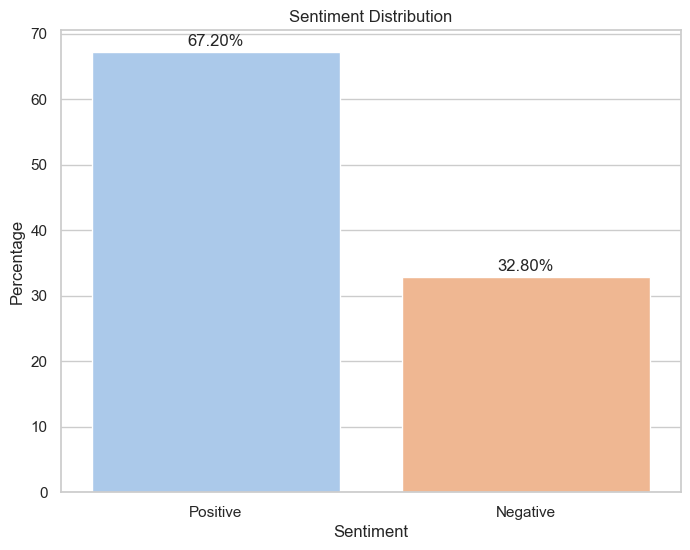

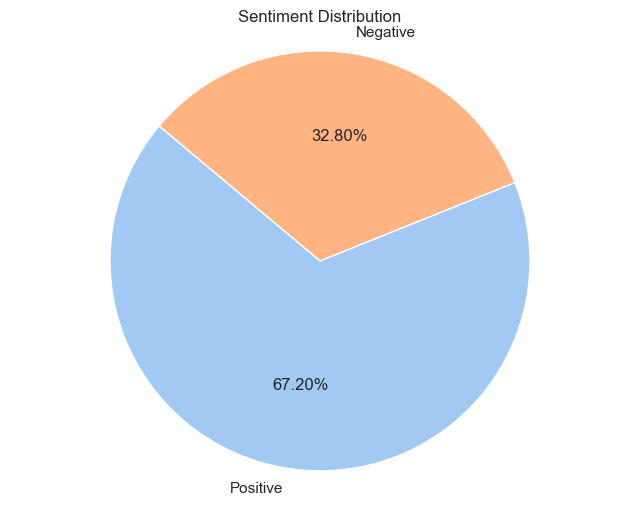

In [13]:
# some visulazization 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = result_df['Sentiment'].value_counts()
sentiment_counts


#Calculate the percentage of each sentiment
total_samples = len(result_df)
sentiment_percentages = (sentiment_counts / total_samples) * 100


plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette="pastel")

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution')

# Display percentages on the bars
for index, value in enumerate(sentiment_percentages):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Show the plot
plt.show()

#----------------------------------------------------------------------------------------------------

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%.2f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

In [14]:
x=result_df[result_df['Sentiment']=='Negative']
x.head(500)

Text Sentiment
0     love music singing donna taggart babe hugs kisses  Negative
3                               looking great ladies xx  Negative
5                               beautiful gorgeous babe  Negative
6                        lovely win wedding anniversary  Negative
9                                    aww stunning xxxxc  Negative
...                                                 ...       ...
1155                                    congratulations  Negative
1156      awww congrats donna mccaughey delighted ye xx  Negative
1158                                    congratulations  Negative
1160                                    congratulations  Negative
1164                  congratulations donna colm family  Negative

[500 rows x 2 columns]

## roberto approach on the aggreated dataset (insta and fb)

In [15]:
torch.backends.cudnn.benchmark = False
MODEL1 = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer1 = AutoTokenizer.from_pretrained(MODEL1)
config1 = AutoConfig.from_pretrained(MODEL1)
model1 = AutoModelForSequenceClassification.from_pretrained(MODEL1)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [16]:
import pandas as pd
from tqdm import tqdm
from scipy.special import softmax

# Define the sentiment labels
sentiment_labels = ['roberta_neg', 'roberta_neu', 'roberta_pos']

# Initialize an empty list to store the sentiment dictionaries
sentiment_scores_list = []

# Iterate through each text in the 'Comment Text' column
# Iterate through each text in the 'Comment Text' column
for text in tqdm(df['Comment Text'], total=len(df)):
    if isinstance(text, str):  # Check if the value is a string
        try:
            text = preprocess1(text)
            text = preprocess(text)
            encoded_text = tokenizer1(text, return_tensors='pt')
            output = model1(**encoded_text)
            scores = output[0][0].detach().numpy()  # Applying softmax
            scores = softmax(scores)
            scores_dict = {label: score for label, score in zip(sentiment_labels, scores)}
            sentiment_scores_list.append(scores_dict)
        except RuntimeError:
            print(f'Broke for text: {text}')
    else:
        print(f'Skipped non-string value: {text}')
# Convert the list of sentiment dictionaries to a DataFrame
sentiment_scores_df = pd.DataFrame(sentiment_scores_list)

# Concatenate the original DataFrame with the sentiment scores DataFrame
data_with_sentiment_ROBERTA = pd.concat([df, sentiment_scores_df], axis=1)

data_with_sentiment_ROBERTA

100%|██████████| 18843/18843 [1:16:32<00:00,  4.10it/s]  


User Id                Username  \
1925          2083566082               m.annison   
1926           310795143                  n.mac3   
1927          3115951443       kathleenchappelle   
1928          4225496225             gmcgothigan   
1929          5588613038           janie.clark88   
...                  ...                     ...   
4027        1055595264.0             Wayne Green   
4017         569786106.0             Chris Gwilt   
4018   100034302920891.0        Breege Mc Cauley   
15563       1549772365.0  Grace Colmenares Clark   
3185   100006096853910.0             Akshay Dhar   

                                            Comment Text              Date  \
1925   I love your music and singing Donna taggart ba...  2017-09-28 21:07   
1926   Love your music wish i could have been there h...  2017-09-28 21:56   
1927   Looking fabulous ladies. hope your night was a...  2017-09-28 22:06   
1928                             Looking great ladies.xx  2017-09-28 22:25   
1929   DONNA i would love to see you in concert if an...  2017-10-01 02:15   
...                                                  ...               ...   
4027                    You will be sensational Donna! x  2023-07-06 18:26   
4017   Delighted to see this announcement Donna Tagga...  2023-07-07 08:06   
4018                                     Good luck Donna  2023-07-09 00:46   
15563  I have shared this song, Donna Taggart with a ...  2023-07-09 03:37   
3185                                              lovely  2023-07-09 17:42   

       roberta_neg  roberta_neu  roberta_pos  
1925      0.094236     0.655780     0.249984  
1926      0.003827     0.019858     0.976315  
1927      0.032529     0.832838     0.134634  
1928      0.003783     0.019694     0.976523  
1929      0.003495     0.008672     0.987833  
...            ...          ...          ...  
4027      0.092895     0.226785     0.680320  
4017      0.008430     0.015030     0.976539  
4018      0.009502     0.031417     0.959080  
15563     0.004221     0.041958     0.953821  
3185      0.003736     0.014385     0.981879  

[18843 rows x 7 columns]

## visulization and coustome function to determine lables and bit of data ceaning ( on the aggreated dataset (insta and fb))

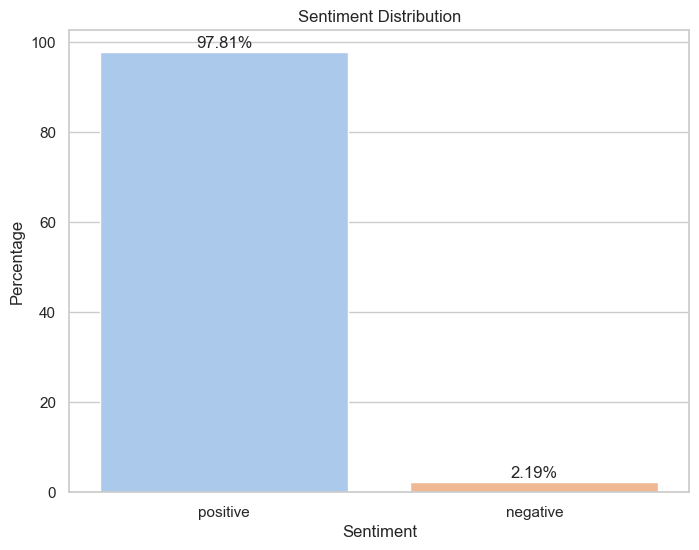

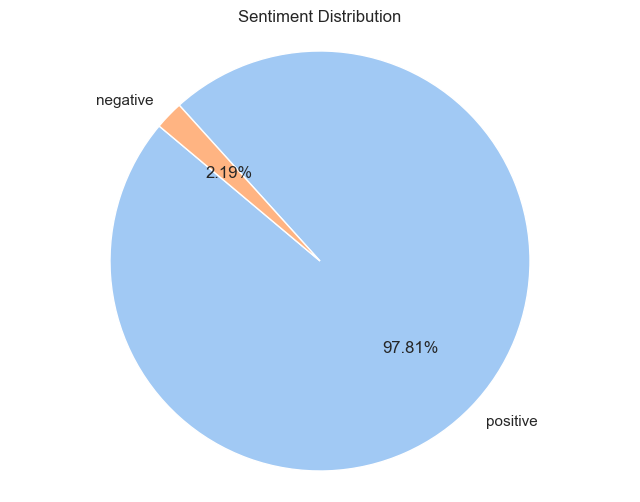

In [23]:
data_with_sentiment_ROBERTA
data_with_sentiment_ROBERTA.isnull().sum()
print()
data_with_sentiment_ROBERTA=data_with_sentiment_ROBERTA.dropna()

data_with_sentiment_ROBERTA.isnull().sum()
data_with_sentiment_ROBERTA








# Custom function to determine sentiment label
def get_sentiment(row):
    max_score = max(row['roberta_neg'], row['roberta_neu'], row['roberta_pos'])
    if max_score == row['roberta_neg']:
        return 'negative'
    elif max_score == row['roberta_neu']:
        return 'positive'
    else:
        return 'positive'

# Apply the custom function to create the 'sentiment' column
data_with_sentiment_ROBERTA['sentiment'] = data_with_sentiment_ROBERTA.apply(get_sentiment, axis=1)
selected_columns = ['User Id', 'Username', 'Comment Text', 'Date','sentiment']
sentiment = data_with_sentiment_ROBERTA[selected_columns]
sentiment



# visulization
# some visulazization 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = sentiment['sentiment'].value_counts()
sentiment_counts


#Calculate the percentage of each sentiment
total_samples = len(sentiment)
sentiment_percentages = (sentiment_counts / total_samples) * 100


plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette="pastel")

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution')

# Display percentages on the bars
for index, value in enumerate(sentiment_percentages):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Show the plot
plt.show()

#----------------------------------------------------------------------------------------------------

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%.2f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


Date            User Id                Username  \
0     2017-09-28 21:07:00         2083566082               m.annison   
1     2017-09-28 21:56:00          310795143                  n.mac3   
2     2017-09-28 22:06:00         3115951443       kathleenchappelle   
3     2017-09-28 22:25:00         4225496225             gmcgothigan   
4     2017-10-01 02:15:00         5588613038           janie.clark88   
...                   ...                ...                     ...   
18822 2023-07-06 18:26:00       1055595264.0             Wayne Green   
18823 2023-07-07 08:06:00        569786106.0             Chris Gwilt   
18824 2023-07-09 00:46:00  100034302920891.0        Breege Mc Cauley   
18825 2023-07-09 03:37:00       1549772365.0  Grace Colmenares Clark   
18826 2023-07-09 17:42:00  100006096853910.0             Akshay Dhar   

                                            Comment Text  roberta_neg  \
0      I love your music and singing Donna taggart ba...     0.094236   
1      Love your music wish i could have been there h...     0.003827   
2      Looking fabulous ladies. hope your night was a...     0.032529   
3                                Looking great ladies.xx     0.003783   
4      DONNA i would love to see you in concert if an...     0.003495   
...                                                  ...          ...   
18822                   You will be sensational Donna! x     0.092895   
18823  Delighted to see this announcement Donna Tagga...     0.008430   
18824                                    Good luck Donna     0.009502   
18825  I have shared this song, Donna Taggart with a ...     0.004221   
18826                                             lovely     0.003736   

       roberta_neu  roberta_pos sentiment  
0         0.655780     0.249984  positive  
1         0.019858     0.976315  positive  
2         0.832838     0.134634  positive  
3         0.019694     0.976523  positive  
4         0.008672     0.987833  positive  
...            ...          ...       ...  
18822     0.226785     0.680320  positive  
18823     0.015030     0.976539  positive  
18824     0.031417     0.959080  positive  
18825     0.041958     0.953821  positive  
18826     0.014385     0.981879  positive  

[18827 rows x 8 columns]

## time series visulization on the aggreated data 

In [24]:
data_with_sentiment_ROBERTA.set_index('Date', inplace=True)
data_with_sentiment_ROBERTA.index = pd.to_datetime(data_with_sentiment_ROBERTA.index)


In [26]:




time_plot = data_with_sentiment_ROBERTA[['roberta_pos', 'roberta_neg']]  # Selecting both columns

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=time_plot.index.min().date(),
        end_date=time_plot.index.max().date()
    ),
    dcc.Graph(id='time-plot'),
])

@app.callback(
    Output('time-plot', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_time_plot(start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    filtered_time_plot = time_plot[(time_plot.index >= start_date) & (time_plot.index <= end_date)]

    fig = px.line(filtered_time_plot, title="Zoomable Time Plot")
    fig.update_xaxes(title_text="Time")
    fig.update_yaxes(title_text="Value")  # Update the y-axis label

    fig.update_layout(
        xaxis_rangeslider_visible=True,
        xaxis_rangeslider_thickness=0.1,
        xaxis_type="date"
    )

    for column in filtered_time_plot.columns:
        fig.add_scatter(x=filtered_time_plot.index, y=filtered_time_plot[column], mode='lines+markers', name=column)

    fig.update_xaxes(rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),
        rangeslider=dict(visible=True),
        type="date"
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
    


## emotion classification 

In [ ]:
MODEL = f"SamLowe/roberta-base-go_emotions"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
comments = sentiment.iloc[:,2].tolist()
emotion_mapping = {
    0: "admiration",
    1: "amusement",
    2: "anger",
    3: "annoyance",
    4: "approval",
    5: "caring",
    6: "confusion",
    7: "curiosity",
    8: "desire",
    9: "disappointment",
    10: "disapproval",
    11: "disgust",
    12: "embarrassment",
    13: "excitement",
    14: "fear",
    15: "gratitude",
    16: "grief",
    17: "joy",
    18: "love",
    19: "nervousness",
    20: "optimism",
    21: "pride",
    22: "realization",
    23: "relief",
    24: "remorse",
    25: "sadness",
    26: "surprise",
    27: "neutral"
}


from tqdm import tqdm

# Create a list to store the emotion predictions
emotion_predictions = []

# Iterate through the comments and classify emotions
for comment in tqdm(comments, desc="Classifying emotions"):
    inputs = tokenizer(comment, return_tensors="pt", padding="max_length", truncation=True, max_length=128)
    outputs = model(**inputs)
    predicted_emotion = torch.argmax(outputs.logits).item()
    emotion_name = emotion_mapping[predicted_emotion]
    emotion_predictions.append(emotion_name)

# Add the predicted emotion names to the DataFrame
sentiment["predicted_emotion"] = emotion_predictions

 

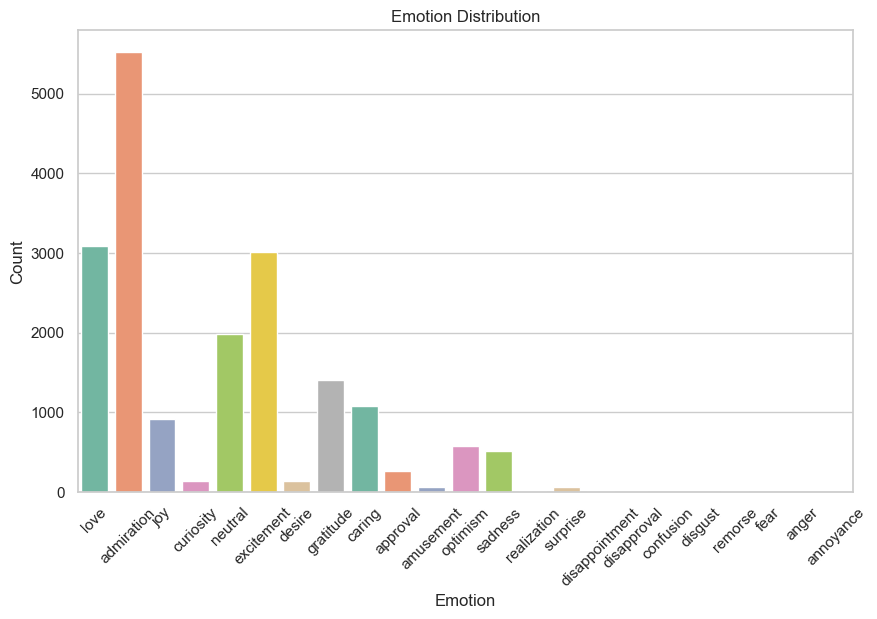

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'emotion' column
plt.figure(figsize=(10, 6))
sns.countplot(data=sentiment, x='predicted_emotion', palette='Set2')
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


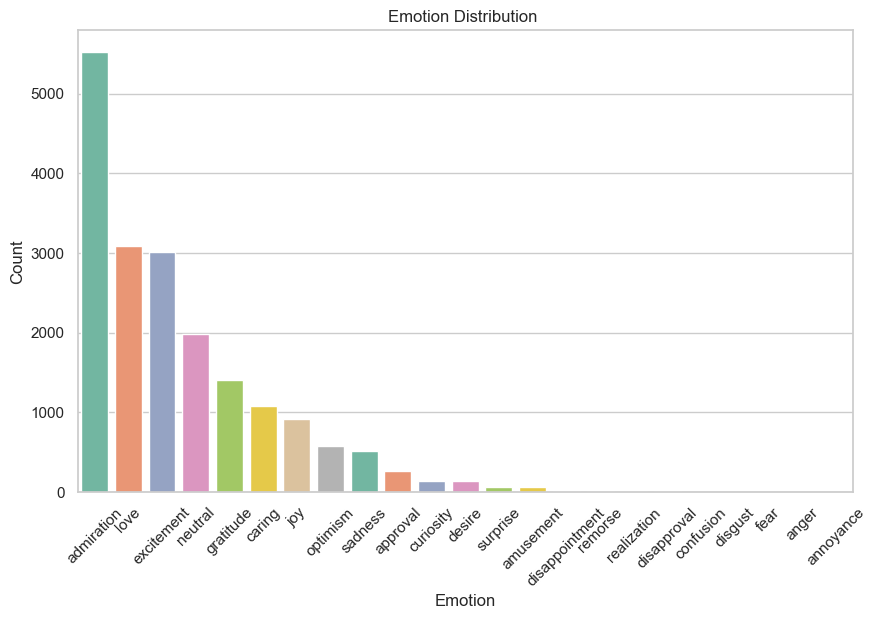

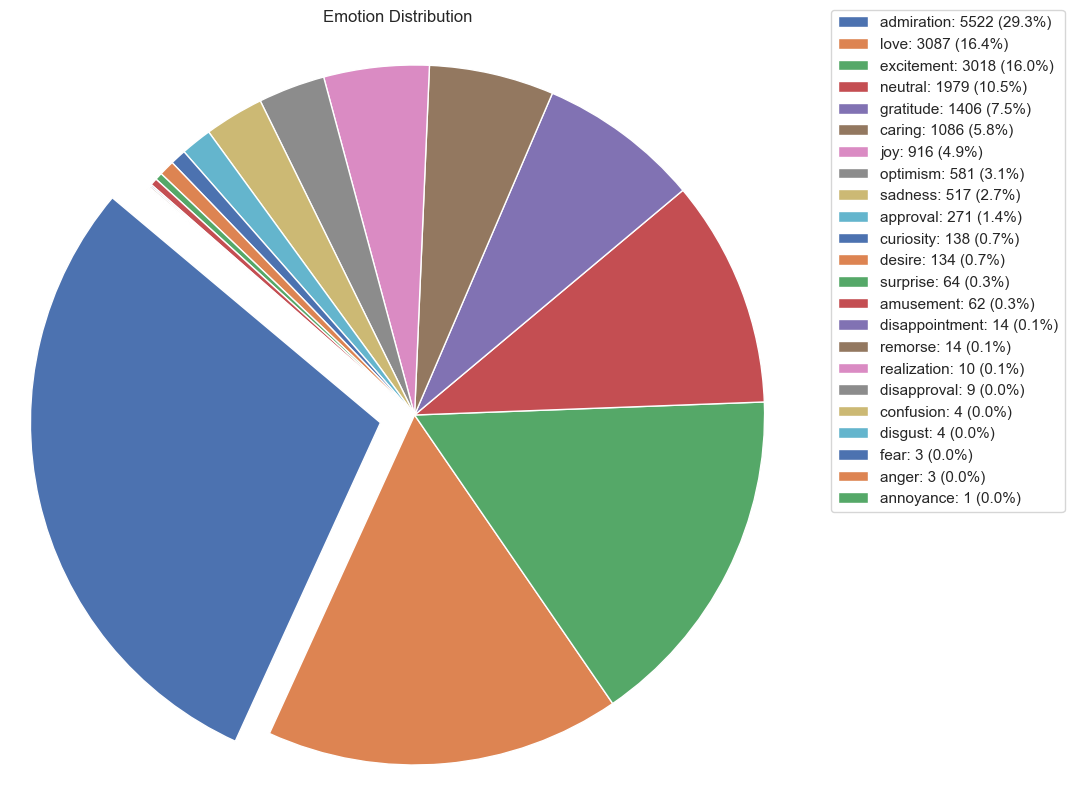

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

emotion_counts = sentiment['predicted_emotion'].value_counts().reset_index()
emotion_counts.columns = ['predicted_emotion', 'count']
sorted_emotion_counts = emotion_counts.sort_values(by='count',ascending=False)

# Create the countplot with sorted order
plt.figure(figsize=(10, 6))
sns.countplot(data=sentiment, x='predicted_emotion', palette='Set2', order=sorted_emotion_counts['predicted_emotion'])
plt.title("Emotion Distribution ")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



import matplotlib.pyplot as plt
import numpy as np

# Assuming 'sentiment_Rising' is your DataFrame with 'predicted_emotion' column
emotions_data = sentiment['predicted_emotion']

# Get emotion counts
emotions = emotions_data.value_counts()
emotions = emotions[emotions >= 1]  # Filter out emotions with zero counts

# Explode the first slice (optional)
explode = (0.1,) + (0,) * (len(emotions) - 1)

# Create a pie chart without labels
plt.figure(figsize=(10, 10))
wedges, _, autotexts = plt.pie(emotions, labels=None, autopct='', startangle=140, explode=explode, pctdistance=0.85)

# Calculate the positions for the legend
bbox = (1.05, 0.7)
legend_labels = [f"{emotion}: {count} ({percent:.1f}%)"
                 for emotion, count, percent in zip(emotions.index, emotions, 100.0 * emotions / emotions.sum())]
plt.legend(legend_labels, loc="center left", bbox_to_anchor=bbox)

# Set title
plt.title("Emotion Distribution")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add colors next to the pie chart
colors = [w.get_facecolor() for w in wedges]
for at, color in zip(autotexts, colors):
    at.set_text('')  # Remove text from slices
    at.set_color(color)

# Show the pie chart
plt.show()



In [12]:
sentiment

User Id                Username  \
1925          2083566082               m.annison   
1926           310795143                  n.mac3   
1927          3115951443       kathleenchappelle   
1928          4225496225             gmcgothigan   
1929          5588613038           janie.clark88   
...                  ...                     ...   
4027        1055595264.0             Wayne Green   
4017         569786106.0             Chris Gwilt   
4018   100034302920891.0        Breege Mc Cauley   
15563       1549772365.0  Grace Colmenares Clark   
3185   100006096853910.0             Akshay Dhar   

                                            Comment Text              Date  
1925   I love your music and singing Donna taggart ba...  2017-09-28 21:07  
1926   Love your music wish i could have been there h...  2017-09-28 21:56  
1927   Looking fabulous ladies. hope your night was a...  2017-09-28 22:06  
1928                             Looking great ladies.xx  2017-09-28 22:25  
1929   DONNA i would love to see you in concert if an...  2017-10-01 02:15  
...                                                  ...               ...  
4027                    You will be sensational Donna! x  2023-07-06 18:26  
4017   Delighted to see this announcement Donna Tagga...  2023-07-07 08:06  
4018                                     Good luck Donna  2023-07-09 00:46  
15563  I have shared this song, Donna Taggart with a ...  2023-07-09 03:37  
3185                                              lovely  2023-07-09 17:42  

[18843 rows x 4 columns]

## Grouping of the comments 

In [9]:
sentiment 
grouped = sentiment.groupby('User Id')['Comment Text'].agg(list).reset_index()        
grouped['num_comments'] = grouped['Comment Text'].apply(len)
print(grouped)

# Iterate through each row of the DataFrame
for index, row in grouped.iterrows():
    user_id = row['User Id']
    comments = row['Comment Text']
    print(f"User ID: {user_id}")
    for comment in comments:
        print(comment)
    print("--------" * 30)  # Adding a separator between users



grouped = grouped.sort_values(by='num_comments', ascending=False)
grouped
grouped['num_comments'].unique()

         User Id                                       Comment Text  \
0      1412530.0  [God definitely made the right choice in picki...   
1     18417604.0  [So amazing and it came out at a time I lost 2...   
2     22922422.0                      [Can’t wait for the link-USA]   
3     39807476.0  [Today was my Aunts funeral. Your song Jealous...   
4     79700925.0  [We loved hearing you at the bluebird cafe. Yo...   
...          ...                                                ...   
9473  9763149642                            [Beautiful couple. Xxx]   
9474  9766338200  [Yes Ma'am❤️❤️❤️, Wow! Wish I could have been ...   
9475  9794389844  [This song gets me crying 😢 every time. They p...   
9476   983238971            [Love it - Happy Easter from San Diego]   
9477  9953014921  [You were amazing Donna ❤️👭❤️🎼🎼🇮🇪🇮🇪👏👏⭐️⭐️⭐️⭐️⭐...   

      num_comments  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  


array([167, 104,  67,  54,  52,  50,  47,  41,  39,  38,  37,  36,  35,
        34,  33,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,  21,
        20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,   8,
         7,   6,   5,   4,   3,   2,   1], dtype=int64)

In [10]:
df =grouped
min_comments = df['num_comments'].min()
max_comments = df['num_comments'].max()
# Function to normalize comments to the 1-100 range
def normalize_comments(num_comments):
    return ((num_comments - min_comments) / (max_comments - min_comments)) * 99 + 1

# Apply the normalization function to the DataFrame
df['Normalized_Comments_count'] = df['num_comments'].apply(normalize_comments)

# Display the normalized data
df



User Id                                       Comment Text  \
8317         1182168466  [@officialsarahdarling  thank you Sarah, delig...   
6391  100007641663979.0  [nan, nan, I  Love Your Voice and Song  Thanks...   
9296         6900950573  [An Amazing voice ,and Great Songs .❤️, A Grea...   
8505         1915446048  [Amen Blessings upon u, That song u sang reall...   
8783          310795143  [Love your music wish i could have been there ...   
...                 ...                                                ...   
4852  100002250536545.0  [That you so much for your music.\nAnd Have a ...   
1757       1385948896.0  [Please sing this song in its entirety, so bea...   
4850  100002246850141.0  [My husband passed away three years ago and th...   
1758       1386491285.0                                 [Happy Birthday 🎉]   
0             1412530.0  [God definitely made the right choice in picki...   

      num_comments  Normalized_Comments_count  
8317           167                 100.000000  
6391           104                  62.427711  
9296            67                  40.361446  
8505            54                  32.608434  
8783            52                  31.415663  
...            ...                        ...  
4852             1                   1.000000  
1757             1                   1.000000  
4850             1                   1.000000  
1758             1                   1.000000  
0                1                   1.000000  

[9478 rows x 4 columns]

In [15]:
from sklearn.cluster import KMeans

# Assuming df is your DataFrame with 'userid' and 'Normalized_Comments' columns
X = df[['Normalized_Comments_count']]

# Define the number of clusters (K)
n_clusters = 3

# Create a K-Means model
kmeans = KMeans(n_clusters=n_clusters,random_state=52)

# Fit the model to your data
df['Cluster'] = kmeans.fit_predict(X)

# Map cluster labels to meaningful segment names
cluster_mapping = {
    0: 'Low Contributor- Ambient',
    2: 'High Contributor-Super ',
    1: ' Moderate Contributor - Engaged'
}
df['Contribution_Category'] = df['Cluster'].map(cluster_mapping)

# Display the segmented data
df


User Id                                       Comment Text  \
8317         1182168466  [@officialsarahdarling  thank you Sarah, delig...   
6391  100007641663979.0  [nan, nan, I  Love Your Voice and Song  Thanks...   
9296         6900950573  [An Amazing voice ,and Great Songs .❤️, A Grea...   
8505         1915446048  [Amen Blessings upon u, That song u sang reall...   
8783          310795143  [Love your music wish i could have been there ...   
...                 ...                                                ...   
4852  100002250536545.0  [That you so much for your music.\nAnd Have a ...   
1757       1385948896.0  [Please sing this song in its entirety, so bea...   
4850  100002246850141.0  [My husband passed away three years ago and th...   
1758       1386491285.0                                 [Happy Birthday 🎉]   
0             1412530.0  [God definitely made the right choice in picki...   

      num_comments  Normalized_Comments_count  Cluster  \
8317           167                 100.000000        2   
6391           104                  62.427711        2   
9296            67                  40.361446        1   
8505            54                  32.608434        1   
8783            52                  31.415663        1   
...            ...                        ...      ...   
4852             1                   1.000000        0   
1757             1                   1.000000        0   
4850             1                   1.000000        0   
1758             1                   1.000000        0   
0                1                   1.000000        0   

                Contribution_Category  
8317          High Contributor-Super   
6391          High Contributor-Super   
9296   Moderate Contributor - Engaged  
8505   Moderate Contributor - Engaged  
8783   Moderate Contributor - Engaged  
...                               ...  
4852         Low Contributor- Ambient  
1757         Low Contributor- Ambient  
4850         Low Contributor- Ambient  
1758         Low Contributor- Ambient  
0            Low Contributor- Ambient  

[9478 rows x 6 columns]

In [16]:
df['Contribution_Category'].value_counts()




Contribution_Category
Low Contributor- Ambient           9340
 Moderate Contributor - Engaged     136
High Contributor-Super                2
Name: count, dtype: int64

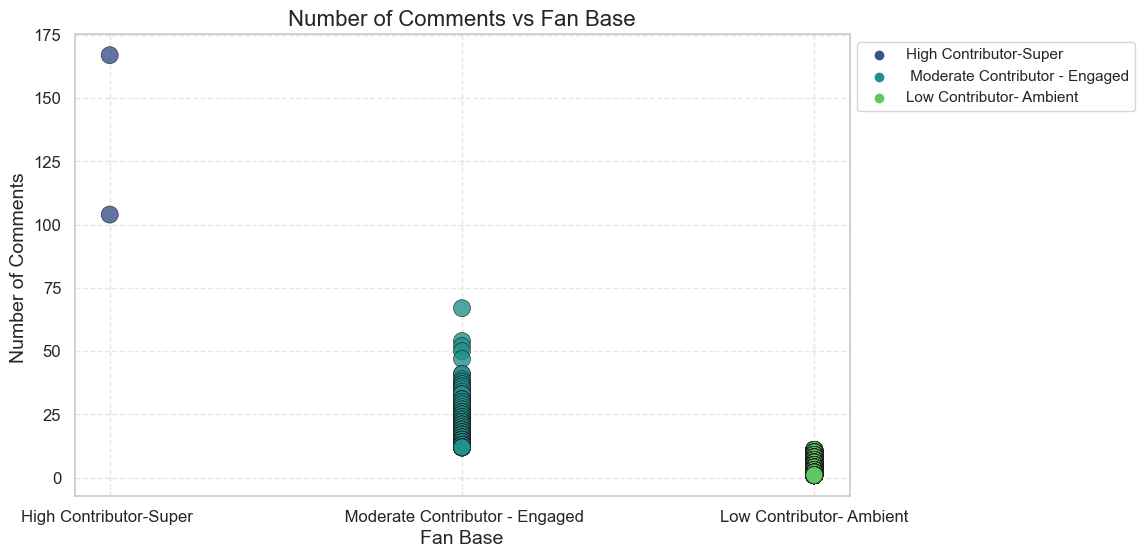

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better aesthetics (optional)
sns.set(style="whitegrid")

# Create a scatter plot with customizations
plt.figure(figsize=(10, 6))

# Use Seaborn's scatterplot to assign colors based on 'Contribution_Category'
scatter = sns.scatterplot(x='Contribution_Category', y='num_comments', hue='Contribution_Category', data=df, palette='viridis', s=150, alpha=0.8, edgecolor='k', linewidth=0.5, marker='o')

plt.xlabel('Fan Base', fontsize=14)
plt.ylabel('Number of Comments ', fontsize=14)
plt.title('Number of Comments vs Fan Base', fontsize=16)

# Add a grid (optional)
plt.grid(True, linestyle='--', alpha=0.5)

# Customize tick labels (optional)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend outside of the plot
legend = plt.legend( loc='upper left', bbox_to_anchor=(1, 1))
legend.get_title().set_fontsize(12)  # Adjust the legend title fontsize

# Increase the vibrancy of the colors




plt.show()


In [40]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a dropdown widget to select user IDs
user_dropdown = widgets.Dropdown(options=["Select User ID"] + list(grouped['User Id']), description='User ID:')


# user_container = widgets.HBox([user_dropdown, user_search])

# Create a search bar widget to search for user IDs
user_search = widgets.Text(placeholder='Search User ID', description='Search:')
search_output = widgets.Output()

# Create a range slider widget to select the comment count range
comment_count_range = widgets.IntRangeSlider(
    value=(1, 50),
    min=1,
    max=1000,
    step=50,
    continuous_update=False
)

# Create an output widget to display the selected user's comments
output = widgets.Output()

# Create a button widget to clear all widgets
clear_button = widgets.Button(description='Clear')



user_container = widgets.HBox([user_dropdown, user_search])
# Function to display comments for a selected user
def display_comments(selected_user):
    with output:
        clear_output(wait=True)
        if selected_user == "Select User ID":
            print("Please select or search for a user ID")
        else:
            selected_comments = grouped[grouped['User Id'] == selected_user]['Comment Text'].iloc[0]
            print(f"User ID: {selected_user}")
            print(f"Number of Comments: {len(selected_comments)}")
            print("\nComments:")
            for comment in selected_comments:
                print(comment)

# Function to handle search bar changes
def on_search_change(change):
    search_term = change['new']
    
    if search_term == "":
        matching_users = grouped
    else:
        matching_users = grouped[grouped['User Id'].astype(str).str.contains(search_term, case=False, na=False)]
    
    with search_output:
        clear_output(wait=True)
        for _, user_row in matching_users.iterrows():
            user_id = user_row['User Id']
            comments = user_row['Comment Text']
            
            print(f"User ID: {user_id}")
            print(f"Number of Comments: {len(comments)}")
            print("Comments:")
            for comment in comments:
                print(comment)
            print("-" * 20)

# Function to handle user selection changes
def on_user_selection(change):
    selected_user = change['new']
    display_comments(selected_user)

# Function to handle comment count range changes
def on_comment_count_change(change):
    min_count, max_count = change['new']
    filtered_users = grouped[(grouped['num_comments'] >= min_count) & (grouped['num_comments'] <= max_count)]
    with output:
        clear_output(wait=True)
        for index, row in filtered_users.iterrows():
            print(f"User ID: {row['User Id']}")
            print(f"Number of Comments: {row['num_comments']}")
            print("-" * 20)

# Function to clear all widgets
def clear_all_widgets(_):
    user_dropdown.value = "Select User ID"
    user_search.value = ""
    with search_output:
        clear_output(wait=True)
    comment_count_range.value = (1, 50)
    with output:
        clear_output(wait=True)

        
        
comment_count_vbox = widgets.VBox([
    widgets.Label('Comment Count Range:'),  # Description label
    comment_count_range  # The slider widget
])


# Assign widget event handlers
user_search.observe(on_search_change, names='value')
user_dropdown.observe(on_user_selection, names='value')
comment_count_range.observe(on_comment_count_change, names='value')
clear_button.on_click(clear_all_widgets)

# Display the widgets and clear button
display(user_container)
# display(user_dropdown)
# display(user_search)
# display(search_output)
# display(comment_count_range)
display(comment_count_vbox)
display(search_output)
display(output)

display(clear_button)  # Display the clear button
# display(comment_count_range)
# display(output)
# final 


Output()

Output()

Button(description='Clear', style=ButtonStyle())

## figure out the topic moddeling without the artist replies 

In [37]:
# outer_merged = pd.concate(merged_df_insta_without_reply, merged_df_fb_without_reply)

concatenated_df = pd.concat([merged_df_insta_without_reply, merged_df_fb_without_reply])
text_list = concatenated_df['Comment Text'].tolist()
text_list = concatenated_df['Comment Text'].apply(lambda x: str(x)).tolist()

text_list



['😍It is so beautiful with daffodils🤗It’s one of my favorite spring flowers🍃💖🌼🦋🍃I wish you a wonderful thursday beautiful Donna🤗🌹',
 '😘❣️',
 '@donnataggartofficial 🌹Thousand thanks🤗many hugs✨🌼❤️🌼✨',
 "We all do ❤️ it's beautiful",
 'So lovely ❤️💗 sending love back! I hope you are well x',
 'Love you 💕',
 "Country mummy's must all be the same 🤭🌼🌻 hope you're all safe and well at this time Donna! 💞",
 '❤️',
 'Lol@brilliant xx',
 '🙏',
 'Same as my own mum and mairead !!! Certainly do us no harm...such tough times we are in ..take care xx',
 'Flowers seem to brighten the day. We’re all like our mothers! 💖Love and stay safe xx',
 'Stay safe Donna and Best Wishes to you and your family ❤️❤️❤️❤️',
 'Donna do you think you could do a we home live version of Jealous Of The Angles for all your followers? Stay Safe',
 'Stay Safe Donna ,and Family. X💞',
 'Beautiful. I just want to say Your song Jealous of the Angels is absolutely Beautiful. It is my ringtone, and I dedicate to my beloved daughter 

In [41]:
concatenated_df
concatenated_df.to_csv('data.csv')

In [39]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Sample documents (replace with your own data)
documents = text_list

# Preprocess the documents
def preprocess(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

processed_documents = [preprocess(doc) for doc in documents]

# Create a dictionary from the preprocessed documents
dictionary = corpora.Dictionary(processed_documents)

# Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_documents]

# Create an LDA model
num_topics =  10 # Specify the number of topics
lda_model = LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics and associated words
for topic_num, topic_words in lda_model.print_topics():
    print(f"Topic #{topic_num + 1}: {topic_words}")

# Get the topic distribution for each document
for i, doc in enumerate(doc_term_matrix):
    print(f"Document {i + 1} - Topic Distribution: {lda_model.get_document_topics(doc)}")





import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Your code for preprocessing, creating LDA model, etc. (same as before)

# Visualize the LDA model
pyLDAvis.enable_notebook()  # If using Jupyter Notebook

# Create a visualization
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)



Topic #1: 0.131*"god" + 0.102*"bless" + 0.048*"lady" + 0.034*"xxx" + 0.029*"family" + 0.021*"nice" + 0.021*"sweet" + 0.018*"words" + 0.018*"dear" + 0.015*"gift"
Topic #2: 0.326*"happy" + 0.228*"birthday" + 0.077*"donna" + 0.034*"year" + 0.033*"anniversary" + 0.031*"new" + 0.028*"blessed" + 0.019*"family" + 0.016*"xx" + 0.011*"hope"
Topic #3: 0.096*"good" + 0.078*"best" + 0.073*"luck" + 0.058*"donna" + 0.035*"singer" + 0.033*"easter" + 0.027*"great" + 0.025*"time" + 0.024*"wishes" + 0.019*"family"
Topic #4: 0.119*"congratulations" + 0.071*"absolutely" + 0.070*"amazing" + 0.065*"beautiful" + 0.063*"nan" + 0.060*"donna" + 0.038*"beth" + 0.037*"xx" + 0.033*"awesome" + 0.031*"fantastic"
Topic #5: 0.151*"day" + 0.073*"donna" + 0.061*"great" + 0.053*"happy" + 0.050*"mother" + 0.039*"hope" + 0.037*"wonderful" + 0.036*"taggart" + 0.033*"night" + 0.027*"play"
Topic #6: 0.098*"donna" + 0.084*"xx" + 0.078*"christmas" + 0.077*"lovely" + 0.072*"family" + 0.065*"enjoy" + 0.060*"merry" + 0.045*"beauti